In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Social_Network_Ads.csv")

In [3]:
X = data.iloc[:, 0:-1].values
y = data.iloc[:, -1].values

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(min_samples_leaf=2, random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=2, random_state=0)

In [6]:
y_pred = classifier.predict(X_test)

In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support, roc_curve, auc
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
stats = precision_recall_fscore_support(y_test, y_pred, average="weighted")

probs = classifier.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

In [9]:
print(cm)

[[57  1]
 [ 4 18]]


In [10]:
print(acc)

0.9375


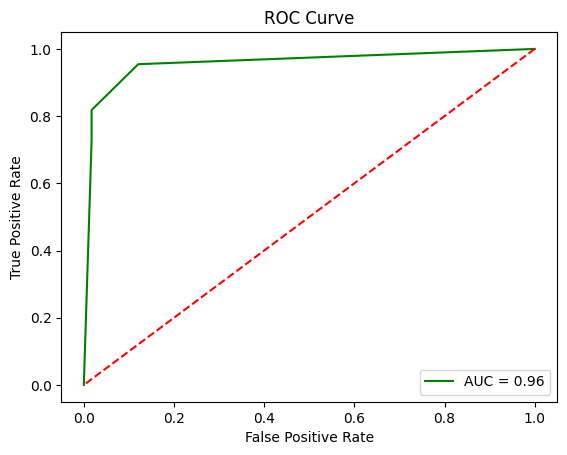

In [11]:
plt.title("ROC Curve")
plt.plot(fpr, tpr, color="green", label='AUC = %0.2f' %roc_auc)
plt.legend(loc="lower right")
plt.plot([1,0],[1,0],"r--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()